In [128]:
library(readxl)
library(tidyverse)
library(stringr)
library(ggplot2)
library(gridExtra)
library(grid)
options(warn = -1)

# Import dataset
Change directory path, data in 'data' in github

In [ ]:
# cambia directory

#setwd("/data_clone")
files <- list.files(path = "data_clone",pattern = "\\.xlsx?$", full.names = TRUE)

process_file <- function(file_path) {
  file_name <- tools::file_path_sans_ext(basename(file_path))
  parts <- str_split(file_name, "_")[[1]]
  tipo <- parts[length(parts)]
  paese <- paste(parts[-length(parts)], collapse = "_")

  df <- read_excel(file_path, skip = 6)
  df <- df %>% filter(!is.na(Anno))
  metadata <- read_excel(file_path, n_max = 6 - 2, col_names = FALSE)

  df$paese <- paese
  df$tipo <- tipo

  return(df)
}

df_list <- lapply(files, process_file)
df_finale <- bind_rows(df_list)

#cat("nrow:", nrow(df_finale), "\n")
#cat("Pesi:", unique(df_finale$paese), "\n")
#cat("Tipi:", unique(df_finale$tipo), "\n")
#cat("Anni:", unique(df_finale$Anno), "\n") ### !!! 'Medio mensile' è considerato un anno, toglibile se da problemi

In [103]:
df_finale_months <- df_finale |> select('GEN':'DIC')
df_finale$std <- apply(df_finale_months,1,sd)/(12)^0.5 # sd over rows
df_finale

Anno,GEN,FEB,MAR,APR,MAG,GIU,LUG,AGO,SET,OTT,NOV,DIC,Medio,paese,tipo,std
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1994,3.7,5.1,14.3,12.4,18.4,22.6,26.4,26.2,19.9,13.8,9.8,3.5,14.7,Auronzo,max,2.369539
1995,1.7,6.3,8.2,14.5,18.0,19.8,26.7,22.5,17.5,17.4,7.3,1.6,13.5,Auronzo,max,2.378230
1996,2.6,4.7,8.6,14.2,18.4,23.8,23.4,22.6,17.3,12.8,6.9,1.9,13.1,Auronzo,max,2.340034
1997,4.6,7.2,13.4,13.7,19.3,20.5,23.6,24.1,22.8,15.3,7.6,2.3,14.5,Auronzo,max,2.224394
1998,3.4,10.2,11.7,11.9,19.5,23.4,25.2,26.1,19.1,13.1,5.3,2.1,14.2,Auronzo,max,2.415747
1999,3.2,4.9,10.5,14.7,19.8,21.7,24.6,23.6,21.0,14.5,5.9,0.8,13.8,Auronzo,max,2.458884
2000,2.3,7.5,11.2,15.3,20.3,25.0,22.8,25.9,21.2,13.9,6.0,3.2,14.5,Auronzo,max,2.457626
2001,2.6,7.4,10.7,13.1,22.0,22.1,24.9,26.3,16.2,16.7,6.6,0.7,14.1,Auronzo,max,2.505402
2002,2.3,7.4,13.1,13.5,18.2,24.4,24.7,23.5,18.6,13.9,8.2,3.1,14.2,Auronzo,max,2.277973


Divide the dataframes for min, max and mean monthly averages

In [104]:
## version without 'Medio mensile'
df_anni <- df_finale %>% 
  filter(Anno != "Medio mensile") %>%
  mutate(Anno = as.numeric(Anno),Medio = as.numeric(Medio))

df_min <- df_anni %>% 
  filter(tipo == "min")
df_max <- df_anni %>% 
  filter(tipo == "max")
df_mean <- df_anni %>% 
  filter(tipo == "mean")


# Part 1)

## 1.1)

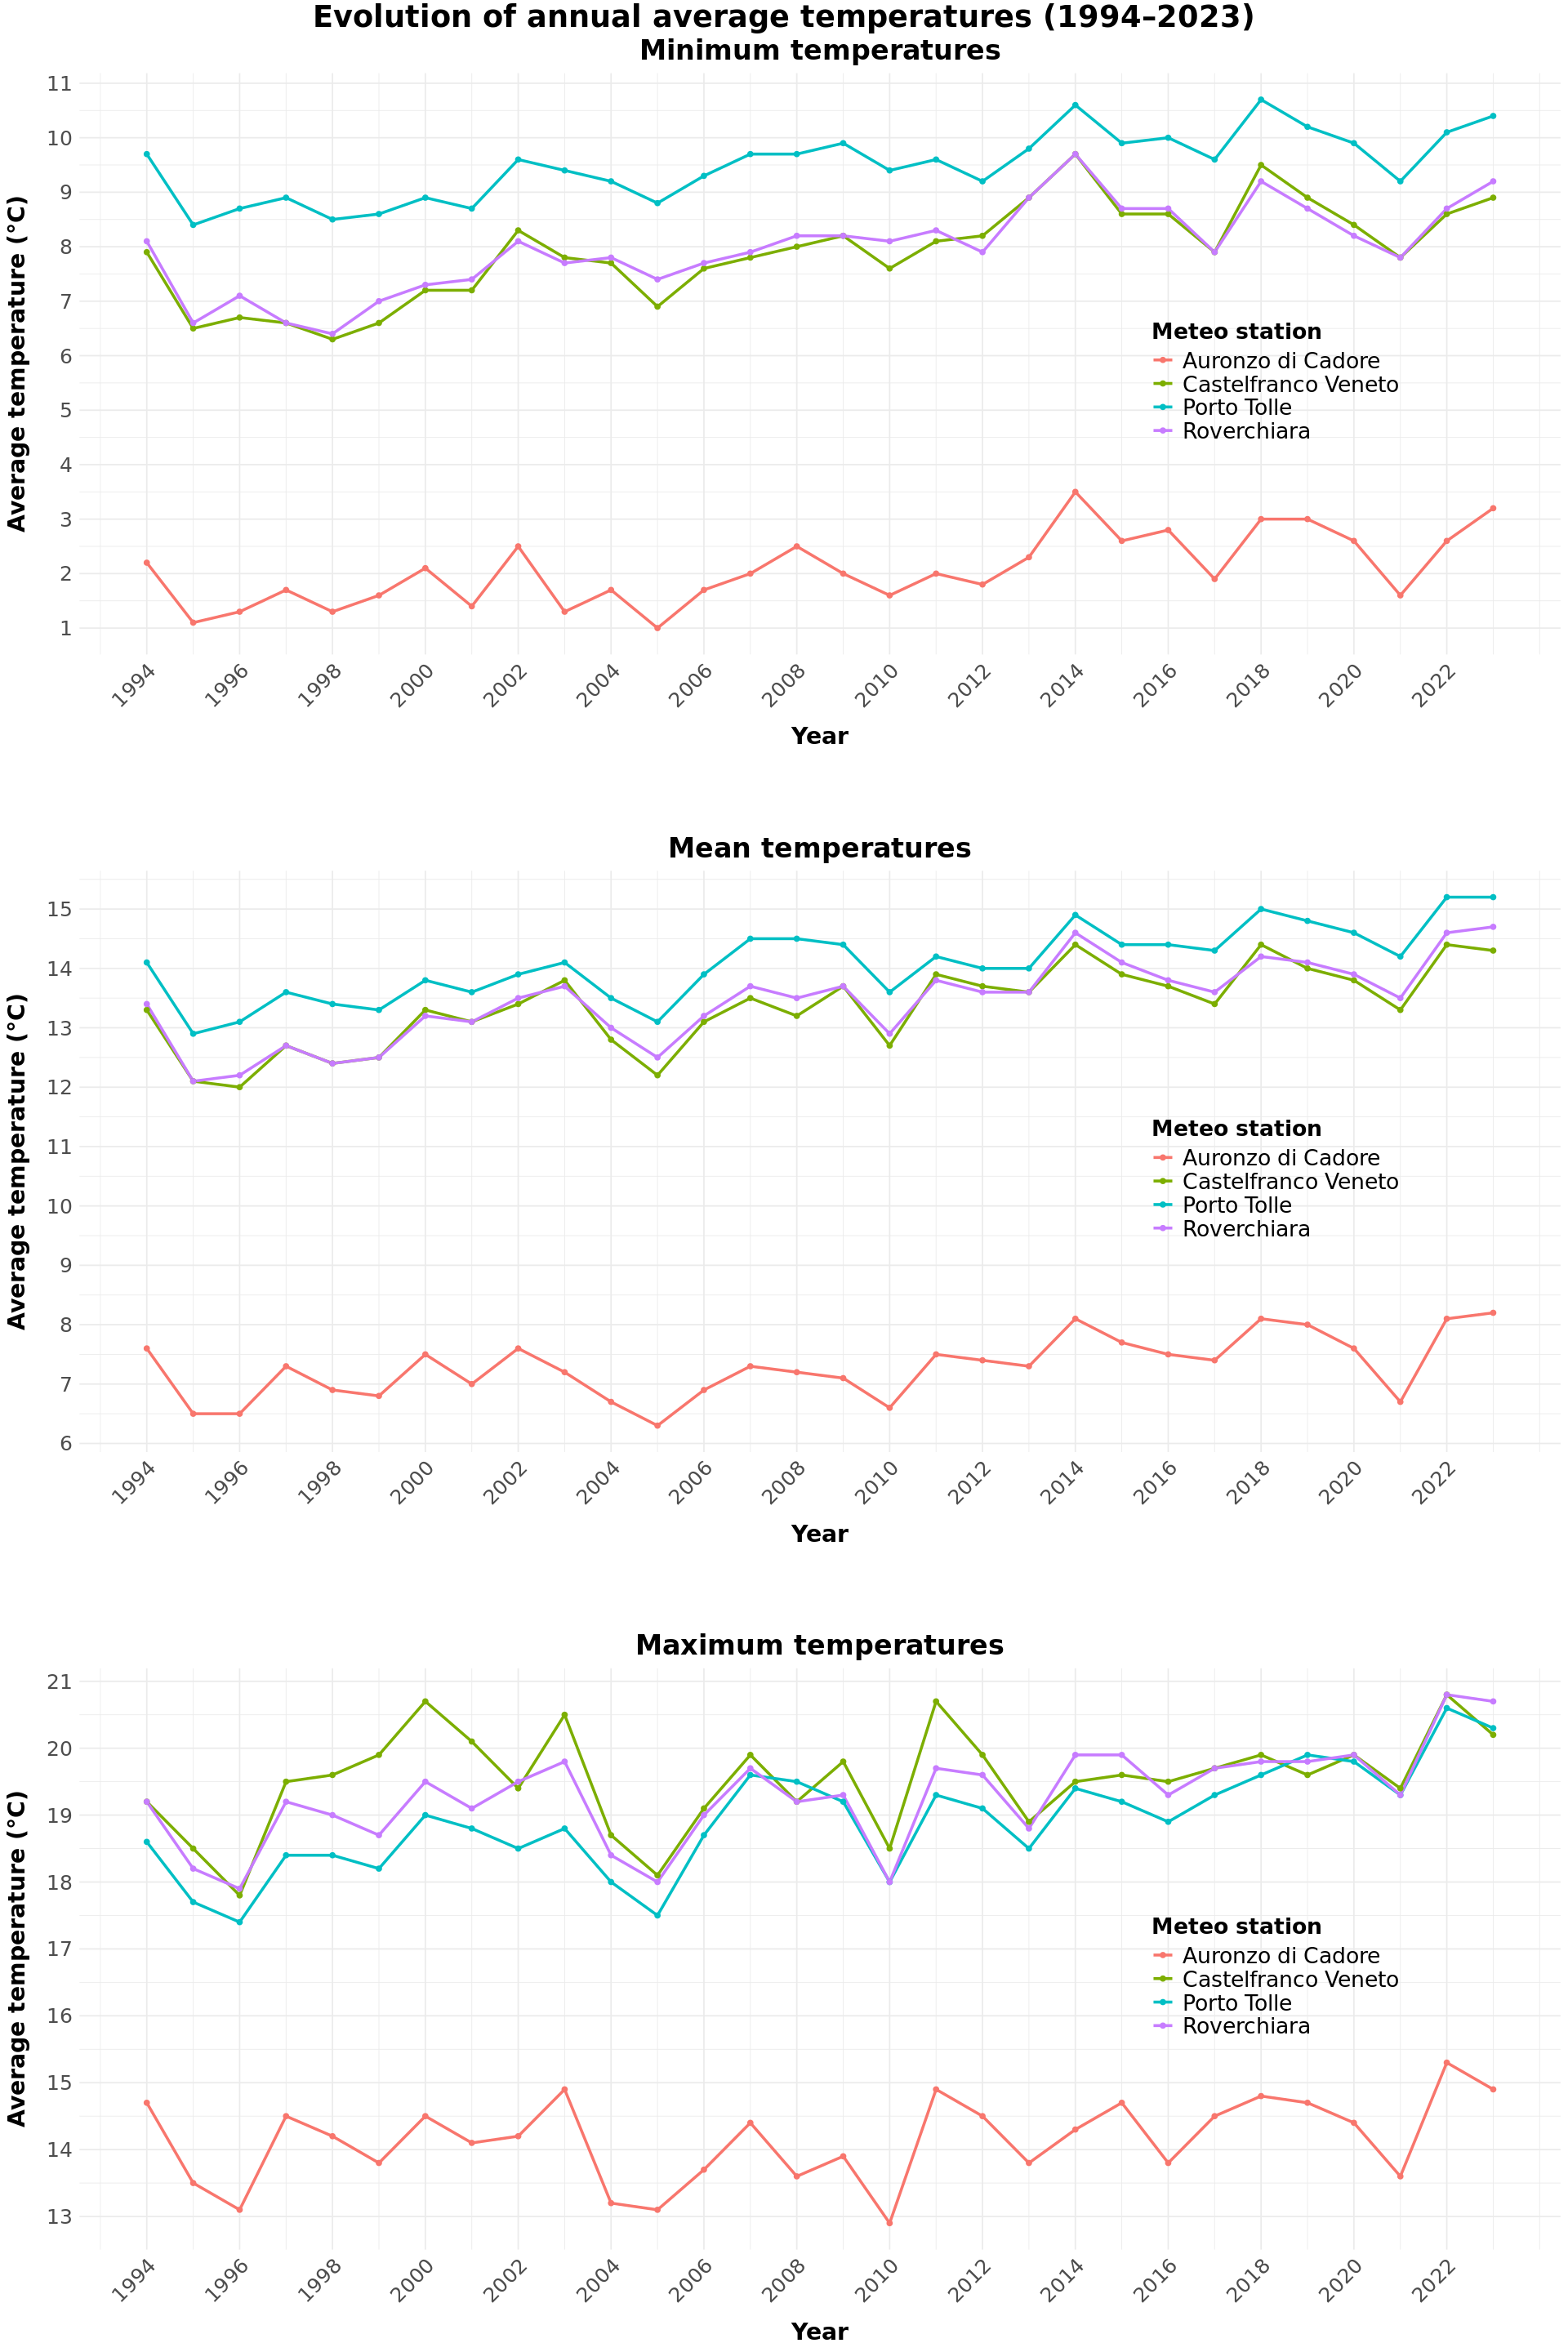

In [108]:

names_stat <- c("Roverchiara" = "Roverchiara", "Castelfranco" = "Castelfranco Veneto",
  "PortoTolle" = "Porto Tolle","Auronzo" = "Auronzo di Cadore")

plot_0 <- function(df, title, names) {
  ggplot(df, aes(x = Anno, y = Medio, color = paese)) +
    geom_line(size = 1) +
    geom_point() +
    scale_color_discrete(labels = names) +
    labs(
      title = title,
      x = "Year",
      y = "Average temperature (°C)",
      color = "Meteo station"
    ) +
    theme_minimal() +
    scale_x_continuous(breaks = seq(1994, 2022, 2)) +
    scale_y_continuous(breaks = seq(0, 21, 1)) +
    theme(
      plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
      axis.text.y = element_text(size = 15),
      axis.title.x = element_text(size = 17, margin = margin(t = 15),face="bold"),
      axis.title.y = element_text(size = 17, margin = margin(r = 15),face="bold"),
      legend.position = c(0.8, 0.47),
      legend.title = element_text(size = 16,face="bold"),
      legend.text = element_text(size = 16)
    )
}


options(repr.plot.width = 16, repr.plot.height = 24)


min_plot <- plot_0(df_min, 'Minimum temperatures', names_stat)
mean_plot <- plot_0(df_mean, 'Mean temperatures', names_stat)
max_plot <- plot_0(df_max, 'Maximum temperatures', names_stat)

grid.arrange(
  min_plot, nullGrob(), mean_plot, nullGrob(), max_plot,
  ncol = 1,
  heights = c(1, 0.1, 1, 0.1, 1),
  top = textGrob('Evolution of annual average temperatures (1994–2023)', 
                 gp = gpar(fontsize = 22, fontface = "bold", col = "black"))
)

In [117]:
#linear fit 

lin_fits <- list()
  
  for (i in names(names_stat)) {  
  df_min_i  <- df_min[df_min$paese == i,]
  df_mean_i <- df_mean[df_mean$paese == i,]
  df_max_i  <- df_max[df_max$paese == i,]
  
  if (nrow(df_min_i) == 0 || nrow(df_mean_i) == 0 || nrow(df_max_i) == 0) {
    cat("No data found for station:", i, "\n")
    next}

  lin_fit_min  <- lm(Medio ~ Anno, data = df_min_i,weights = 1/std^2)
  lin_fit_mean <- lm(Medio ~ Anno, data = df_mean_i,weights = 1/std^2)
  lin_fit_max  <- lm(Medio ~ Anno, data = df_max_i,weights = 1/std^2)

  lin_fits[[i]] <- list(
    min = lin_fit_min,
    mean = lin_fit_mean,
    max = lin_fit_max) }

lin_fits
    

$Roverchiara
$Roverchiara$min

Call:
lm(formula = Medio ~ Anno, data = df_min_i, weights = 1/std^2)

Coefficients:
(Intercept)         Anno  
 -133.46633      0.07045  


$Roverchiara$mean

Call:
lm(formula = Medio ~ Anno, data = df_mean_i, weights = 1/std^2)

Coefficients:
(Intercept)         Anno  
 -115.39676      0.06416  


$Roverchiara$max

Call:
lm(formula = Medio ~ Anno, data = df_max_i, weights = 1/std^2)

Coefficients:
(Intercept)         Anno  
  -85.47794      0.05217  



$Castelfranco
$Castelfranco$min

Call:
lm(formula = Medio ~ Anno, data = df_min_i, weights = 1/std^2)

Coefficients:
(Intercept)         Anno  
 -150.86048      0.07907  


$Castelfranco$mean

Call:
lm(formula = Medio ~ Anno, data = df_mean_i, weights = 1/std^2)

Coefficients:
(Intercept)         Anno  
 -106.60208      0.05973  


$Castelfranco$max

Call:
lm(formula = Medio ~ Anno, data = df_max_i, weights = 1/std^2)

Coefficients:
(Intercept)         Anno  
  -38.42022      0.02884  



$PortoTolle
$Por

In [118]:
lin_summary <- data.frame(
  paese = character(),
  temp = character(),
  intercept = numeric(),
  slope = numeric(),
  intercept_se = numeric(),
  slope_se = numeric(),
  r_squared = numeric(),
  p_value = numeric(),
  residual_se = numeric(),
  stringsAsFactors = FALSE)

for (i in names(lin_fits)) {
  for (stat in c("min", "mean", "max")) {
    fit <- lin_fits[[i]][[stat]]
    summary_fit <- summary(fit)

    lin_summary <- rbind(lin_summary, data.frame(
      paese = i,
      temp = stat,
      intercept = coef(fit)[1],
      slope = coef(fit)[2],
      intercept_se = coef(summary_fit)[, "Std. Error"][1],
      slope_se = coef(summary_fit)[, "Std. Error"][2],
      r_squared = summary_fit$r.squared,
      p_value = coef(summary_fit)[, "Pr(>|t|)"][2], # p-value tests the null hypothesis: fit slope=0
      residual_se = summary_fit$sigma),
      make.row.names = FALSE) }
}
lin_summary

paese,temp,intercept,slope,intercept_se,slope_se,r_squared,p_value,residual_se
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Roverchiara,min,-133.46633,0.07045230,24.36083,0.012129313,0.5464698,3.068058e-06,0.3039682
Roverchiara,mean,-115.39676,0.06415672,18.38244,0.009152791,0.6369927,1.268578e-07,0.1934714
Roverchiara,max,-85.47794,0.05216707,23.49438,0.011697423,0.4153144,1.212519e-04,0.2151822
Castelfranco,min,-150.86048,0.07907165,26.30248,0.013095563,0.5656089,1.652101e-06,0.3065430
Castelfranco,mean,-106.60208,0.05972962,19.81908,0.009867768,0.5668239,1.587046e-06,0.2078729
Castelfranco,max,-38.42022,0.02884306,28.69353,0.014285226,0.1270922,5.314566e-02,0.2775562
PortoTolle,min,-98.29420,0.05367795,18.46647,0.009195042,0.5489605,2.834660e-06,0.2229415
PortoTolle,mean,-99.80082,0.05670854,16.15981,0.008045928,0.6395272,1.147990e-07,0.1751978
PortoTolle,max,-117.01260,0.06767932,21.52530,0.010717091,0.5875090,7.872580e-07,0.2156974


The p-value tests the null hypothesis that the slope coefficient $b$ is compatibile with zero, meaning that there is no statistically significant correlation between the two variables. It is computed defyning the t-student variable:

$$t= \frac{\hat{b}}{\sigma_{\hat{b}}} $$ 

where $\hat{b}$ is the  estimator for the slope and $\sigma_{\hat{b}}$ is its standard deviation, and performing a two-sided hypothesis testing. In almost all cases we can reject the null hypothesis with a very high $CL > 99\%$, and thus claim there is a non zero (in this case positive) correlation between mean temperatures and time, with the exception for:
- Max temperatures in Castelfranco Veneto: p-value = 0.053
- Max temperatures in Auronzo di Cadore: p-value = 0.073

In [121]:

years <- sort(unique(as.numeric(as.character(df_min$Anno))))

pred_df <- data.frame()
years <- unique(df_min$Anno)

for (i in 1:nrow(lin_summary)) {
  row <- lin_summary[i, ]
  model <- lin_fits[[row$paese]][[row$temp]]

  df_stat <- switch(row$temp,
                    "min" = df_min,
                    "mean" = df_mean,
                    "max" = df_max)
  
  df_station <- df_stat[df_stat$paese == row$paese, ]
  
  # linear fit prediction 
  newdata <- data.frame(Anno = years)
  pred <- predict(model, newdata = newdata, se.fit = TRUE)
  
  # compute chi_squared 
  y_obs <- df_station$Medio
  y_pred_obs <- predict(model, newdata = df_station)
  y_err <- df_station$std
  
  chi_squared <- sum(((y_obs - y_pred_obs)^2) / (y_err^2), na.rm = TRUE)


  temp_df <- data.frame(
    paese = row$paese,
    temp = row$temp,
    Anno = years,
    prediction = pred$fit,
    prediction_se = pred$se.fit,
    chi_squared = chi_squared  # same value repeated for all rows
  )
  
  pred_df <- rbind(pred_df, temp_df)
}
pred_df

,paese,temp,Anno,prediction,prediction_se,chi_squared
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Roverchiara,min,1994,7.015564,0.2039319,2.587106
2,Roverchiara,min,1995,7.086016,0.1936390,2.587106
3,Roverchiara,min,1996,7.156468,0.1835706,2.587106
4,Roverchiara,min,1997,7.226921,0.1737657,2.587106
5,Roverchiara,min,1998,7.297373,0.1642715,2.587106
6,Roverchiara,min,1999,7.367825,0.1551449,2.587106
7,Roverchiara,min,2000,7.438278,0.1464548,2.587106
8,Roverchiara,min,2001,7.508730,0.1382834,2.587106
9,Roverchiara,min,2002,7.579182,0.1307282,2.587106


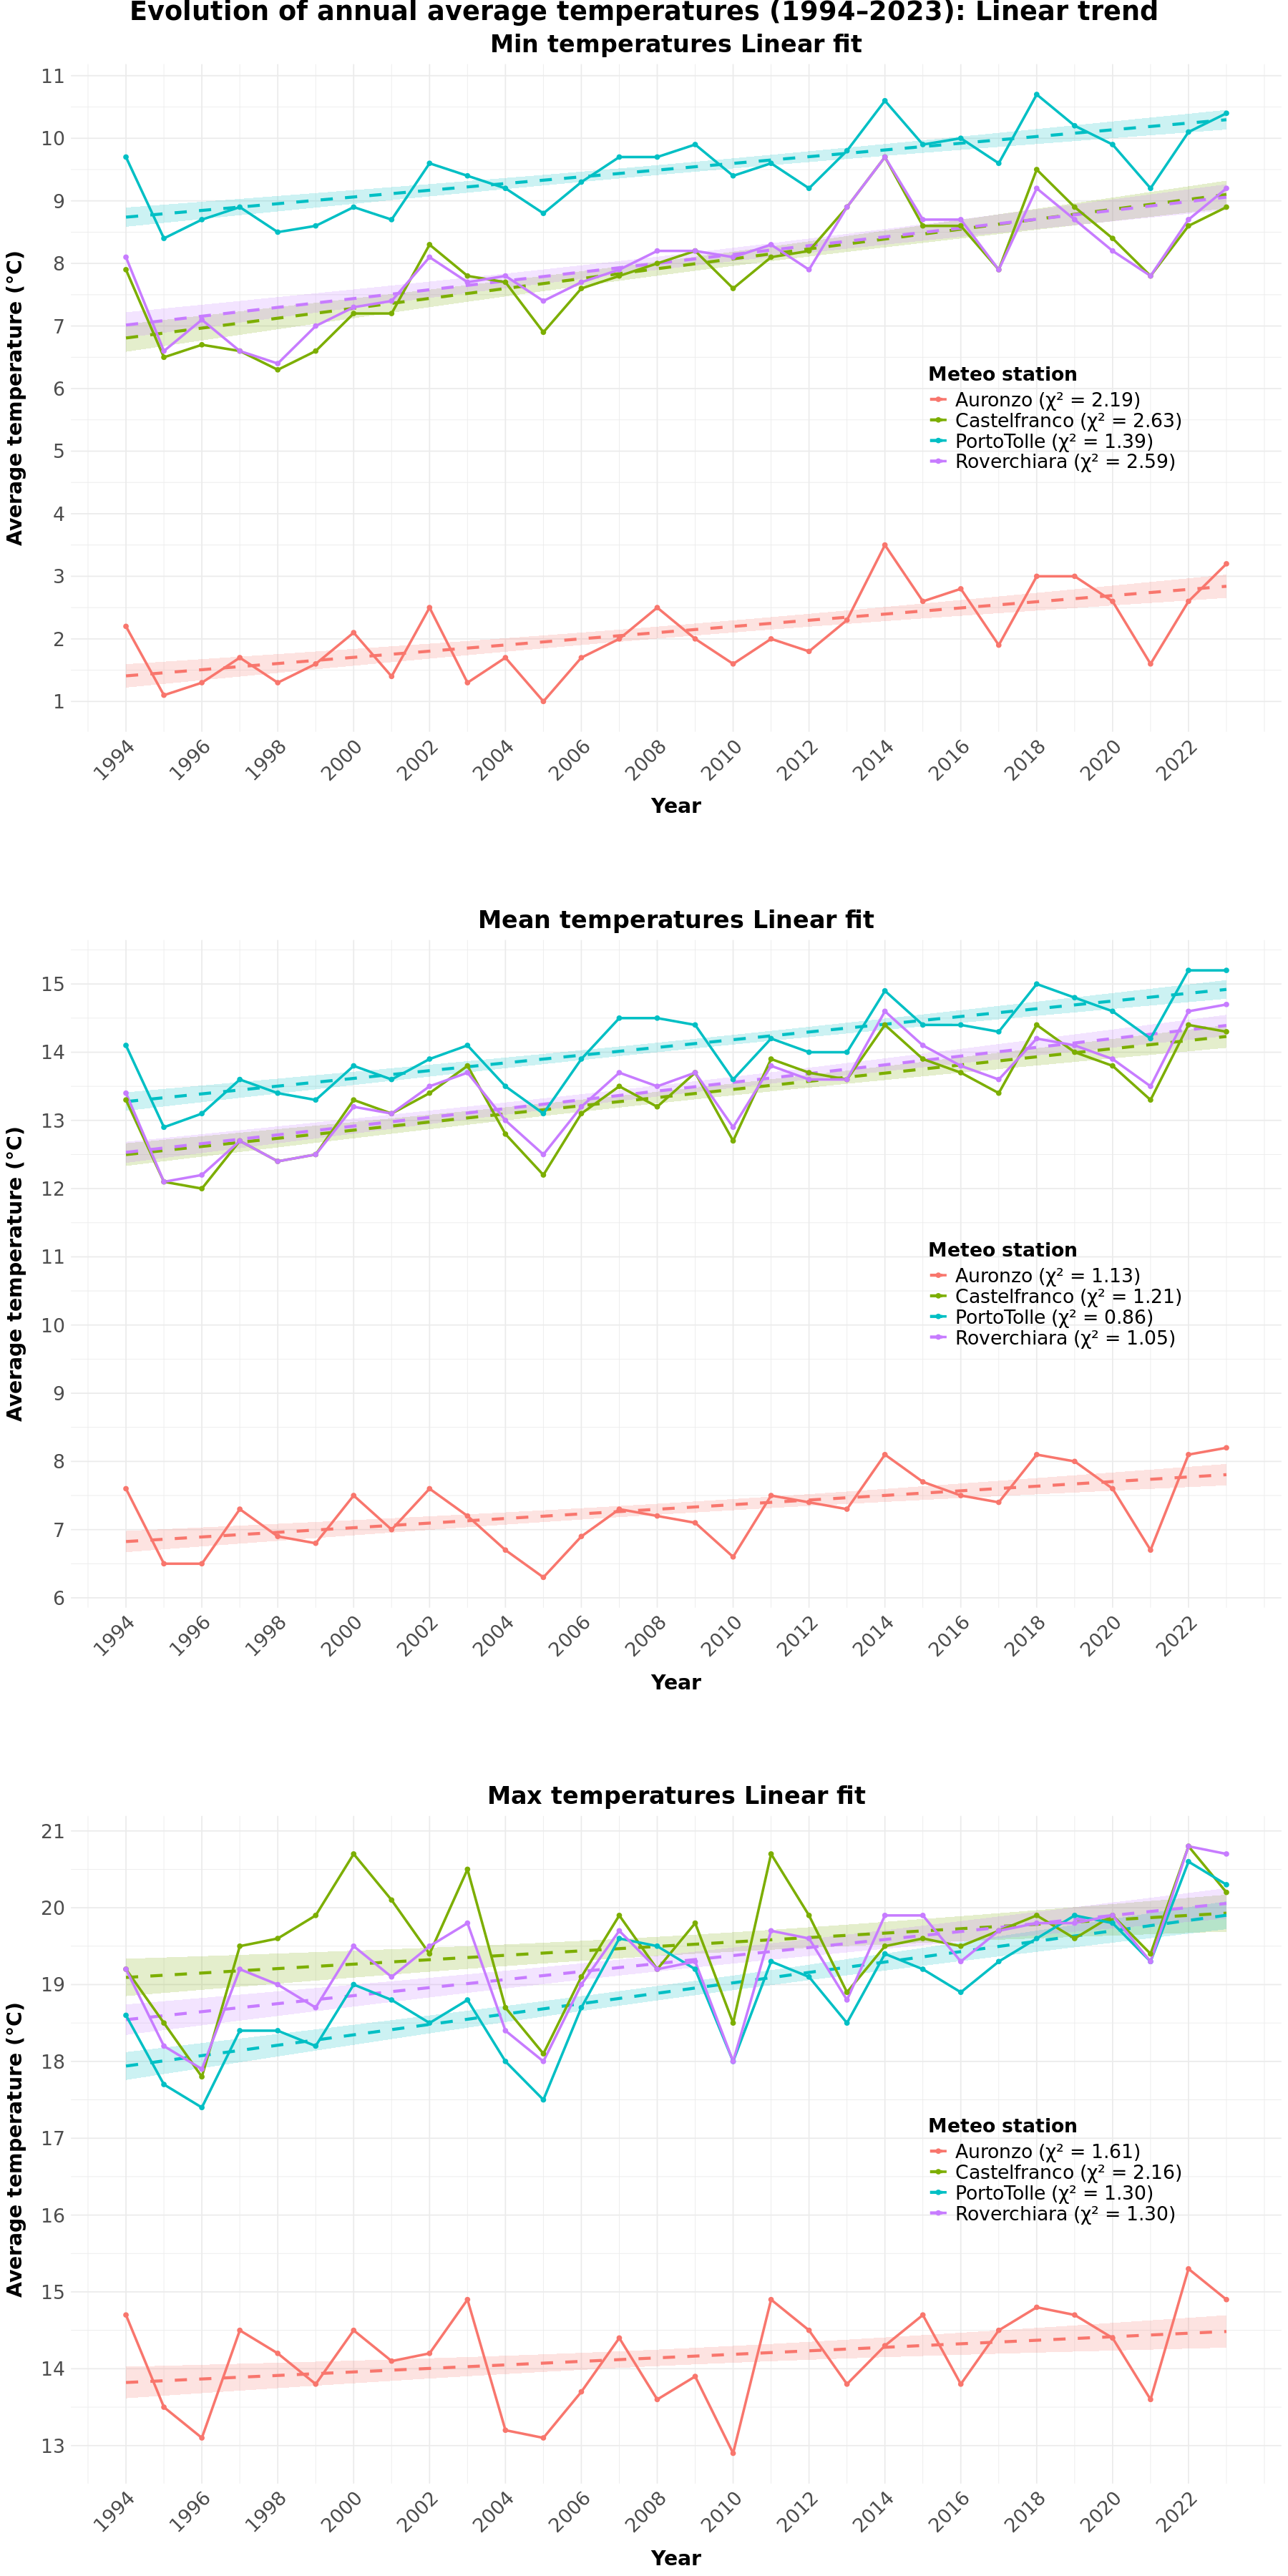

In [142]:
plot_1 <- function(df,pred_df,temp_type,title,names) {
  df <- df[df$tipo == temp_type,]     
  pred_df <- pred_df[pred_df$temp == temp_type,]  
  
  df$Anno <- as.numeric(as.character(df$Anno))
  pred_df$Anno <- as.numeric(as.character(pred_df$Anno))
    
  df$Medio <- as.numeric(as.character(df$Medio))
    
  pred_df$prediction <- as.numeric(as.character(pred_df$prediction))
  pred_df$prediction_se <- as.numeric(as.character(pred_df$prediction_se))
  chi_values <- pred_df |> group_by(paese) |> summarise(chi_squared=mean(chi_squared),.groups = "drop") 
  legend_labels <- setNames(
      sprintf("%s (χ² = %.2f)", chi_values$paese, chi_values$chi_squared),
      chi_values$paese)
    
  ggplot() +
    geom_ribbon(data = pred_df, aes(x=Anno, ymin=prediction-prediction_se, 
                                   ymax = prediction+prediction_se, fill = paese), alpha = 0.2, show.legend = FALSE) +
    geom_line(data = pred_df, aes(x=Anno, y=prediction, color = paese), size = 1.2, linetype = "dashed") +
    geom_line(data = df, aes(x=Anno, y=Medio, color=paese), size = 1) +
    geom_point(data = df, aes(x=Anno, y=Medio, color=paese)) +

    scale_color_discrete(labels = legend_labels) +
    labs(
      title = title,
      x = "Year",
      y = "Average temperature (°C)",
      color = "Meteo station"
    ) +
    theme_minimal() +
    scale_x_continuous(breaks = seq(1994, 2022, 2))+
    scale_y_continuous(breaks = seq(0, 21, 1))+
    theme(
      plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
      axis.text.y = element_text(size = 16),
      axis.title.x = element_text(size = 17, margin = margin(t = 15), face = "bold"),
      axis.title.y = element_text(size = 17, margin = margin(r = 15), face = "bold"),
      legend.position = c(0.8, 0.47),
      legend.title = element_text(size = 16, face = "bold"),
      legend.text = element_text(size = 16)
    )
}


options(repr.plot.width = 15, repr.plot.height = 30)
min_lin_fit_plot <-plot_1(df_finale,pred_df,"min",'Min temperatures: Linear fit',names_stat)
mean_lin_fit_plot <-plot_1(df_finale,pred_df,"mean",'Mean temperatures: Linear fit',names_stat)
max_lin_fit_plot <-plot_1(df_finale,pred_df,"max",'Max temperatures: Linear fit',names_stat)

grid.arrange(
  min_lin_fit_plot, nullGrob(), mean_lin_fit_plot, nullGrob(), max_lin_fit_plot,
  ncol = 1,
  heights = c(1, 0.1, 1, 0.1, 1),
  top = textGrob('Evolution of annual average temperatures (1994–2023): Linear trend', 
                 gp = gpar(fontsize = 22, fontface = "bold", col = "black"), vjust=0.3,just="top" )
)

We perform a $\chi^2$ test evaluate whether the observed data are consistent with a linear model. With 10 degrees of freedom and a $CL=95\%$ the critical value is $\chi^2_0\approx 18.3$, in all cases we obtain significantly lower $\chi^2$ values, thus we can claim that mean temperatures data for all stations are highly consistent with a linear trend model (p-value > 0.989).

In [149]:
p_value_chi <- 1- pchisq(2.59,10)
p_value_chi

[1] 0.9894983